# Проверка гипотез

##### Контекст датасета

Диабет является одним из наиболее распространенных хронических заболеваний в Соединенных Штатах, ежегодно поражающим миллионы американцев и ложащимся значительным финансовым бременем на экономику. Диабет - это серьезное хроническое заболевание, при котором люди теряют способность эффективно регулировать уровень глюкозы в крови и может привести к снижению качества и продолжительности жизни. После того, как различные продукты расщепляются на сахара в процессе переваривания, сахара затем попадают в кровоток. Это сигнализирует поджелудочной железе о выделении инсулина. Инсулин помогает клеткам организма использовать эти сахара в кровотоке для получения энергии. Диабет обычно характеризуется тем, что организм либо не вырабатывает достаточного количества инсулина, либо не в состоянии использовать вырабатываемый инсулин так эффективно, как это необходимо.

Такие осложнения, как болезни сердца, потеря зрения, ампутация нижних конечностей и заболевания почек, связаны с хронически высоким уровнем сахара, остающегося в крови у людей с диабетом. Хотя лекарства от диабета не существует, такие стратегии, как похудение, здоровое питание, активный образ жизни и получение медицинского лечения, могут смягчить вред этого заболевания у многих пациентов. Ранняя диагностика может привести к изменению образа жизни и более эффективному лечению, что делает модели прогнозирования риска развития диабета важными инструментами для общественности и должностных лиц общественного здравоохранения.

Масштаб этой проблемы также важно признать. Центры по контролю и профилактике заболеваний указали, что по состоянию на 2018 год 34,2 миллиона американцев страдают диабетом и 88 миллионов - преддиабетом. Кроме того, по оценкам CDC, 1 из 5 диабетиков и примерно 8 из 10 преддиабетиков не знают о своем риске. Хотя существуют различные типы диабета, диабет II типа является наиболее распространенной формой, и его распространенность варьируется в зависимости от возраста, образования, дохода, местоположения, расы и других социальных детерминант здоровья. Большая часть бремени этого заболевания также ложится на лиц с более низким социально-экономическим статусом. Диабет также ложится тяжелым бременем на экономику: затраты на диагностированный диабет составляют примерно 327 миллиардов долларов, а общие затраты на недиагностированный диабет и преддиабет приближаются к 400 миллиардам долларов в год.

## Предобработка данных

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import plotly.express as px
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
import statsmodels.tsa.api as smt
from scipy import stats
from statsmodels.stats.diagnostic import het_white
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

Изучим имеющиеся данные:

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
data.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

Судя по описанию данных, можно сделать вывод, что данный датасет уже приведен к работе, так как отсутствуют пропуски данных и все данные приведены к целочисленному виду.

## Визуальная оценка показателей

В данном датасете имеются три разделения состояния диабета: отсутсвие диабета, преддиабет и наличие диабета.

In [5]:
data['Diabetes_012'].unique()

array([0., 2., 1.])

Разделим данные по состоянию диабета:

In [6]:
dia_no = data[data['Diabetes_012'] == 0]
dia_pred = data[data['Diabetes_012'] == 1]
dia_yes =  data[data['Diabetes_012'] == 2]

Рассмотрим распределение данных для каждого показателя:

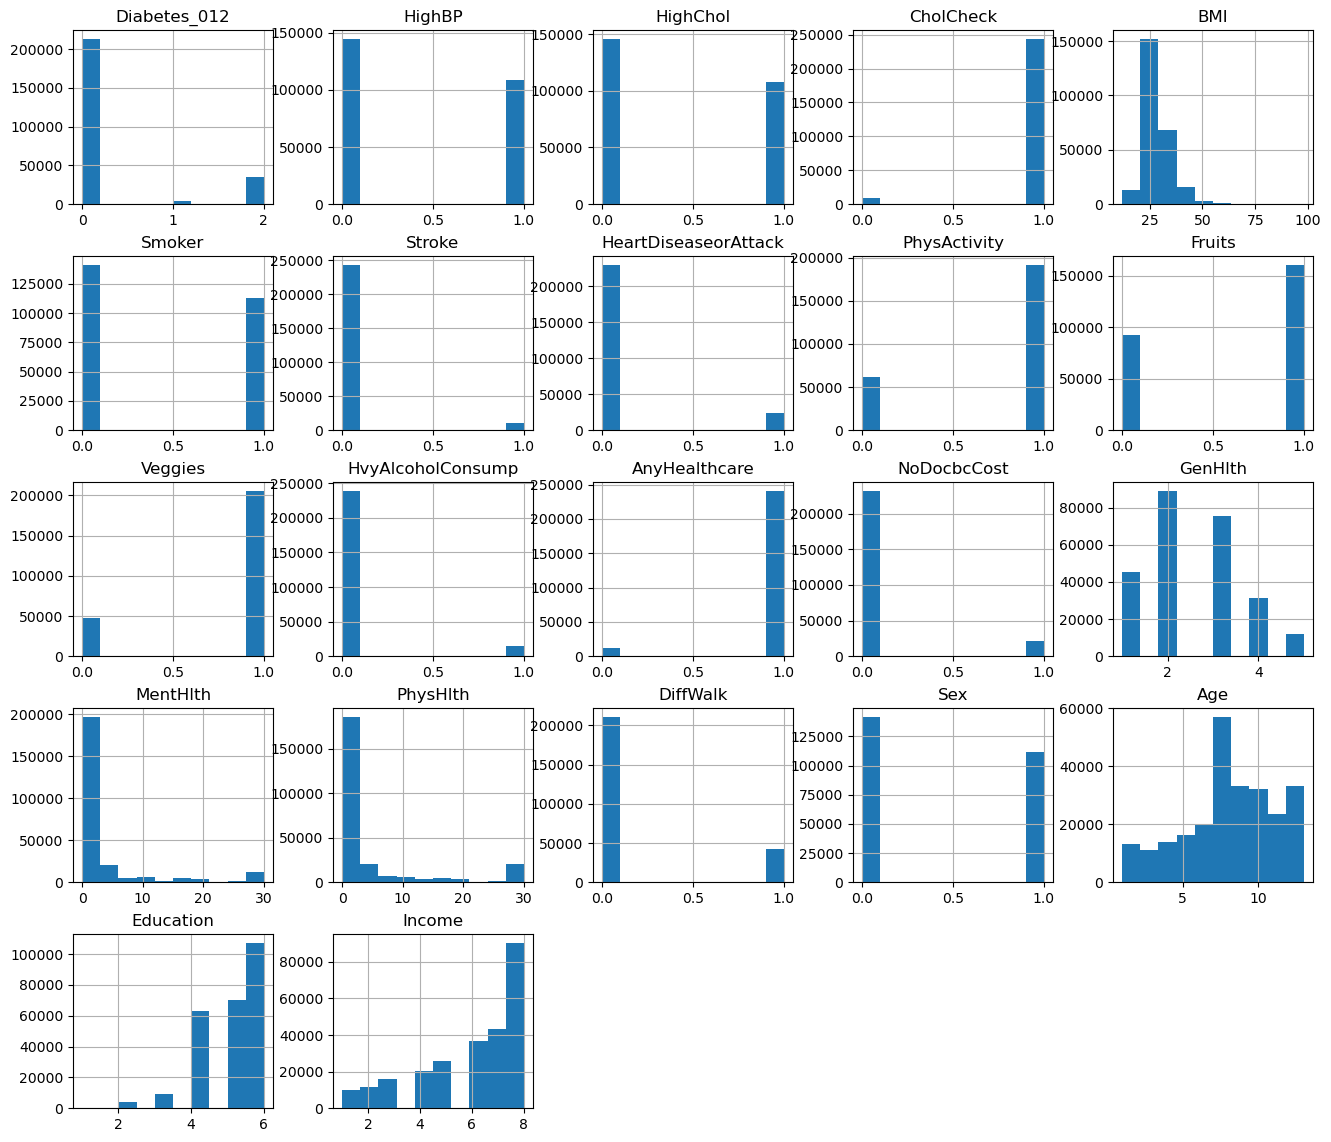

In [7]:
data.hist(figsize=(16, 14));

#### Визуализируем распределение для пола

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

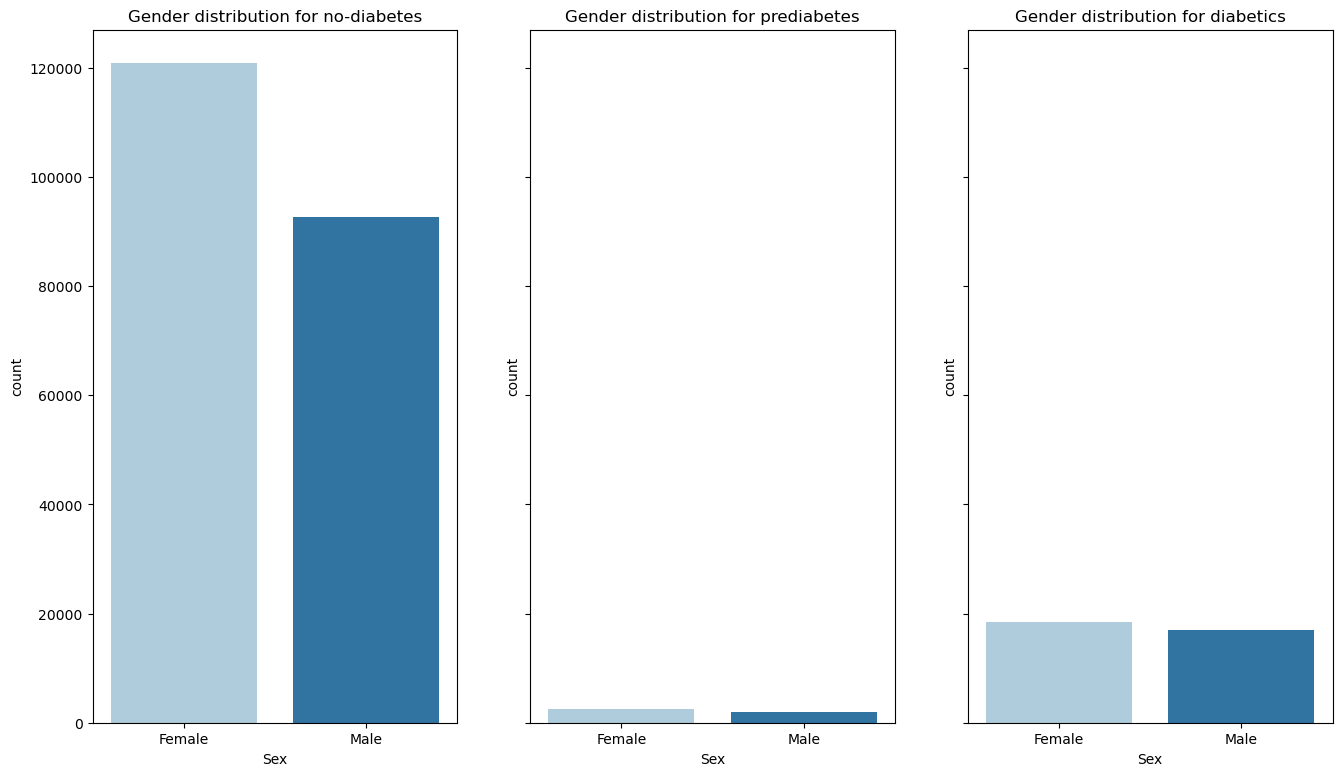

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,9))

ax1 = sns.countplot(data=dia_no, x='Sex', ax=ax1, palette='Paired')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=dia_pred, x='Sex', ax=ax2, palette='Paired')
ax2.set(title='Gender distribution for prediabetes')
ax2.set_xticklabels(['Female', 'Male'])

ax3 = sns.countplot(data=dia_yes, x='Sex', ax=ax3, palette='Paired')
ax3.set(title='Gender distribution for diabetics')
ax3.set_xticklabels(['Female', 'Male'])

In [9]:
data.groupby('Sex').count()

Diabetes_012  HighBP  HighChol  CholCheck     BMI  Smoker  Stroke  \
Sex                                                                      
0.0        141974  141974    141974     141974  141974  141974  141974   
1.0        111706  111706    111706     111706  111706  111706  111706   

     HeartDiseaseorAttack  PhysActivity  Fruits  ...  HvyAlcoholConsump  \
Sex                                              ...                      
0.0                141974        141974  141974  ...             141974   
1.0                111706        111706  111706  ...             111706   

     AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
Sex                                                                      
0.0         141974       141974   141974    141974    141974    141974   
1.0         111706       111706   111706    111706    111706    111706   

        Age  Education  Income  
Sex                             
0.0  141974     141974  141974  
1.0  111706     111706  111706  

[2 rows x 21 columns]

Можно сдклать вывод, что женщины и мужчины равновероятно склонны к диабету.

#### Визуализируем распределение для возраста

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

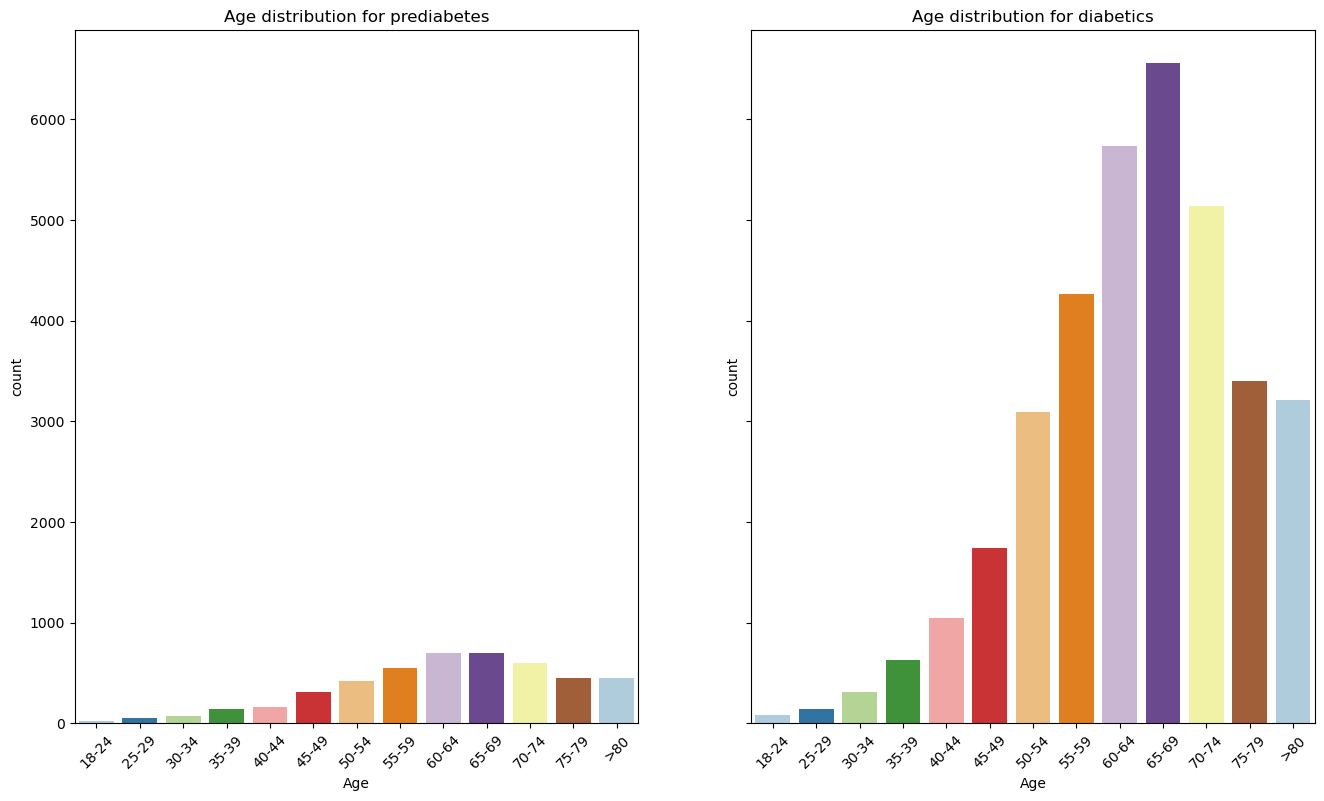

In [10]:
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80']

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))

ax1 = sns.countplot(data=dia_pred, x='Age', ax=ax1, palette='Paired')
ax1.set(title='Age distribution for prediabetes')
ax1.set_xticklabels(labels, rotation = 45)

ax2 = sns.countplot(data=dia_yes, x='Age', ax=ax2, palette='Paired')
ax2.set(title='Age distribution for diabetics')
ax2.set_xticklabels(labels, rotation = 45)

Можно сделать вывод, что к диабету склонны люди среднего и пожилого возраста начиная с 55 до 74 лет.

#### Визуализируем распределение для ИМТ (индекса массы тела)

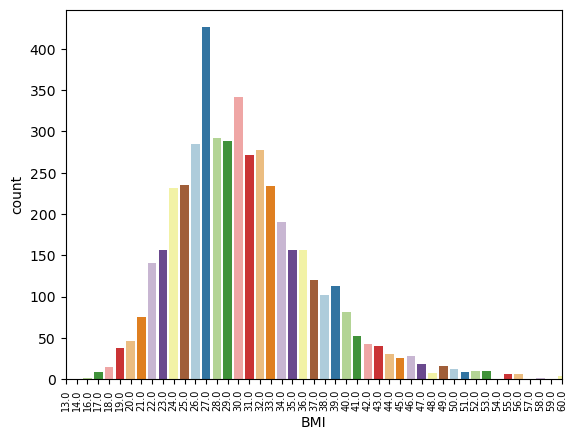

In [11]:
sns.countplot(data=dia_pred, x='BMI', palette='Paired')
plt.xlim(0, 46)
plt.tick_params(axis='x', labelsize=7, rotation = 90)
plt.show()

In [12]:
sns.countplot(data=dia_yes, x='BMI', palette='Paired')
plt.xlim(0, 46)
plt.tick_params(axis='x', labelsize=7, rotation = 90)
plt.show()

Модой распределения является количество людей с диабетом у которых ИМТ равен 27, что немного выше нормы. Распределение ИМТ также явлется нормальным.

Сопоставим ИМТ для людей без диабета, с преддиабетом и с диабетом.

(15.0, 65.0)

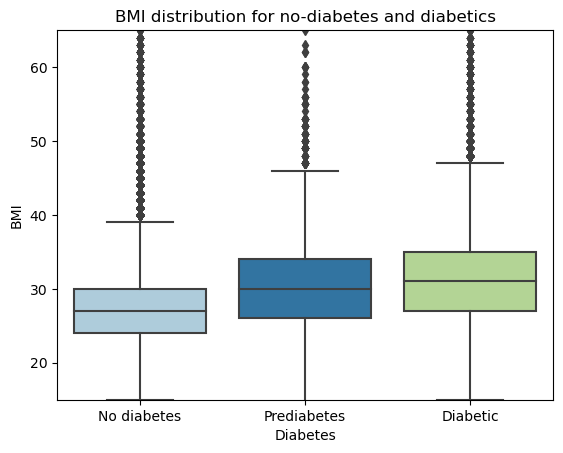

In [13]:
ax = sns.boxplot(data=data, x='Diabetes_012', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for no-diabetes and diabetics')
ax.set_xticklabels(['No diabetes', 'Prediabetes', 'Diabetic'])
ax.set_xlabel('Diabetes')
plt.ylim(15, 65)

Средний ИМТ людей без диабета ниже, чем у людей с преддиабетом, а у людей с преддиабетом средний ИМТ ниже, чем у людей с диабетом.

In [14]:
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
row = 3
col = 2
number = 1

fig = plt.figure(figsize=(16, 18))
for x in col_names:
    plt.subplot(row, col, number)
    ax = sns.countplot(data=data, x=x, hue='Diabetes_012', palette='Paired')
    ax.set(title = '{}'.format(x))
    ax.set(xlabel=None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['No-diabetes', 'Prediabetes', 'Diabetics'])
    number += 1

По данным графикам можно сделать выводы, что люди с диабетом имеют склонность к повышенному уровню холестерина, более высокому кровеносному давлению. Однако показатель курения и алкоголя не оказал значимого влияения на наличие диабета. Уровень физической активности выше у людей без диабета, в то время как люди с наличием диабета испытывают сложности при ходьбе.

#### Матрица корреляции

Построение матрицы корреляции поможет выявить наличие линейных зависимостей и коллинеарности между данными.

<AxesSubplot: >

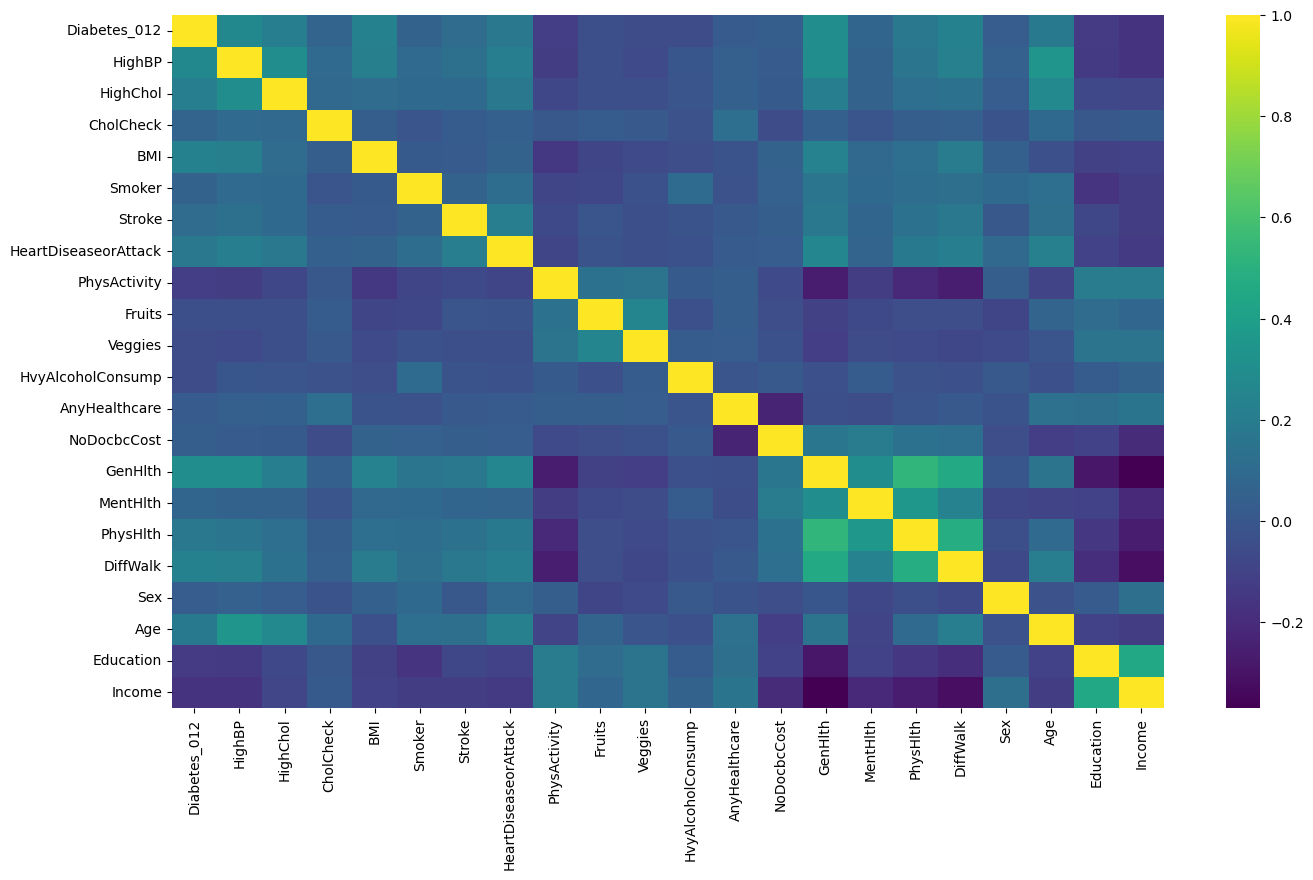

In [15]:
corr_matrix = data.corr()

plt.figure(figsize=(16,9))
sns.heatmap(data=corr_matrix, cmap='viridis')

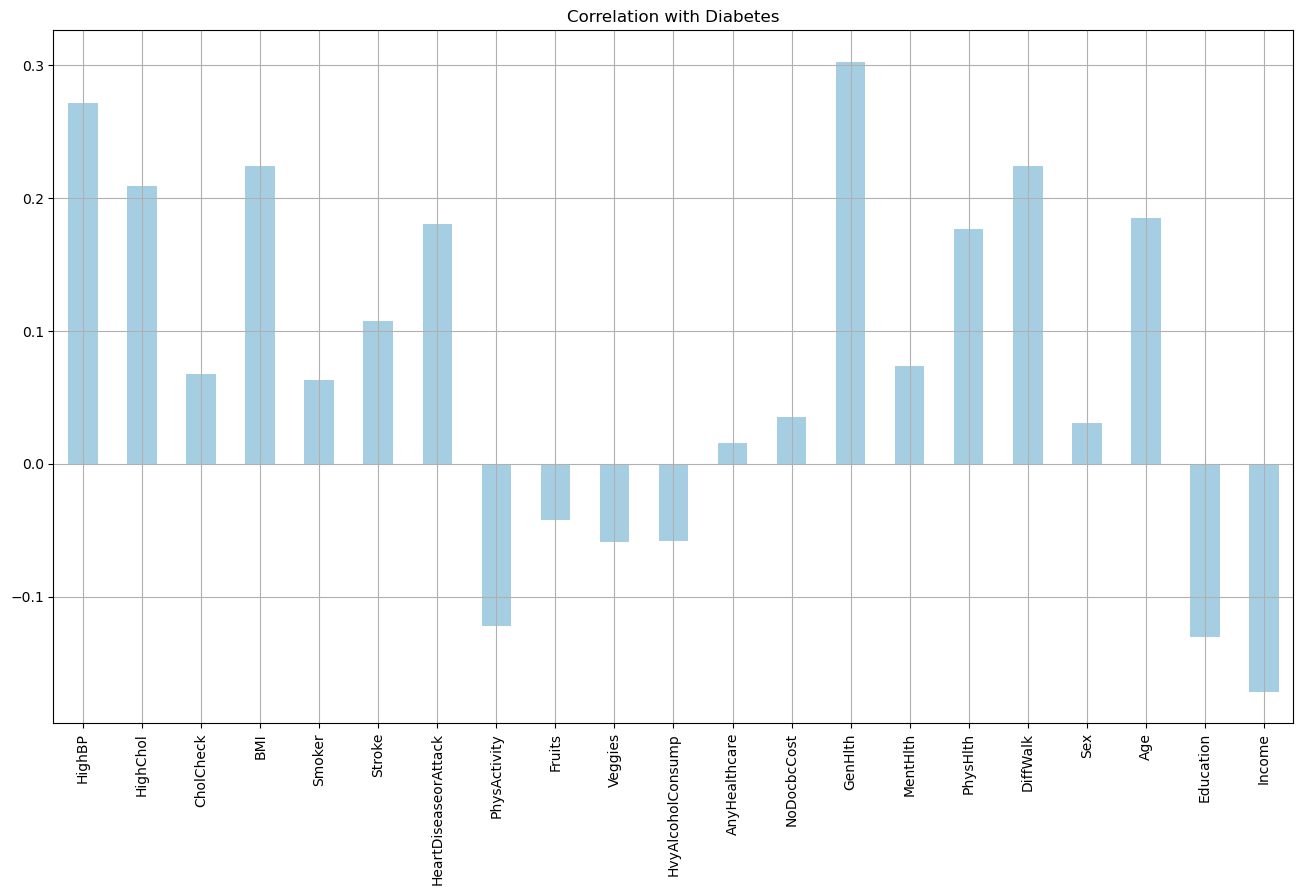

In [16]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012)\
.plot(kind='bar', grid=True, figsize=(16, 9), title='Correlation with Diabetes', cmap='Paired');

Наиболее коррелирующими данными с наличие диабета, а следовательно и влияющие на него больше всего, это показатели кровzного давления, высокого холестерина, ИМТ, приступ сердечной недостаточности, общее здоровье, физическое здоровье, трудности при ходьбе и возраст. Такие показатели как пол, употребление фруктов и овощей, употребление алкоголя, курение и наличие медицинского обслуживания оказали наименьшее влияние.

## Проверка гипотез

### T-критерий

**$H_0$** - люди страдающие диабетом и не имеющие диабет имеют одинаковый усредненный показатель ИМТ.

**$H_1$** - люди страдающие диабетом и не имеющие диабет имеют различные показатели ИМТ.

Изучим показатели ИМТ:

In [17]:
ax = px.treemap(data, path=['BMI', 'Diabetes_012'], title="BMI counts")
ax.show()

In [18]:
bmi_no = dia_no['BMI']
bmi_yes =  dia_yes['BMI']

Рассмотрим распределение ИМТ:

In [19]:
sns.kdeplot(bmi_no, color='blue')
sns.kdeplot(bmi_yes, color='red')
plt.grid()
plt.title('BMI distribution')
plt.legend(['No-diabetes', 'Diabetics'])

Вычисляем средний ИМТ для каждой из групп:

In [20]:
avg_bmi_no = bmi_no.mean()
avg_bmi_yes = bmi_yes.mean()

print(f'Average BMI for no-diabetics is {round(avg_bmi_no, 4)}\n' +
      f'Average BMI for diabetics is {round(avg_bmi_yes, 4)}')

Average BMI for no-diabetics is 27.7425
Average BMI for diabetics is 31.944


Далее вычисляем разницу по модулю:

In [21]:
avg_diff = abs(avg_bmi_no - avg_bmi_yes)
print(f'Different between no-diabetics and diabetics is {round(avg_diff, 4)}')

Different between no-diabetics and diabetics is 4.2015


Дальше вычисляем стандартную ошибку разности выборочных средних:

In [22]:
n_no = bmi_no.shape[0]
n_yes = bmi_yes.shape[0]

var_no = np.var(bmi_no, ddof = 1)
var_yes = np.var(bmi_yes, ddof = 1)

se = np.sqrt(((n_no-1)*var_no+(n_yes-1)*var_yes)/(n_no+n_yes-2))
print(f'Standart error between no-diabetics and diabetics is {round(se, 4)}')

Standart error between no-diabetics and diabetics is 6.429


Статистика критерия Стюдента:

In [23]:
t_criterion = avg_diff/(se*np.sqrt(1/n_no+1/n_yes))

print(f'T-criterion for no-diabetics and diabetics is {round(t_criterion, 4)}')

T-criterion for no-diabetics and diabetics is 113.8138


Плотности вероятностей:

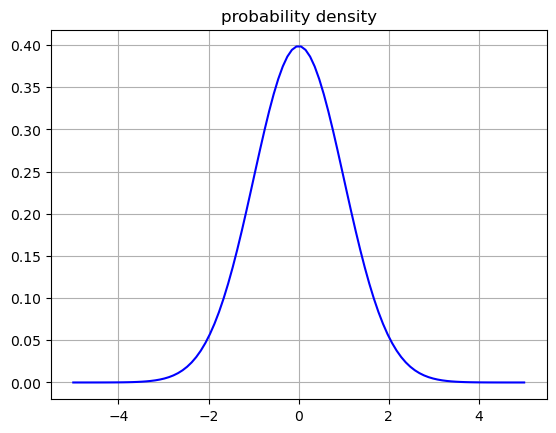

In [24]:
x = np.linspace(-5.0, 5.0, 100)
df = (n_no + n_yes) - 2

plt.plot(x, stats.t.pdf(x, df), color = 'blue')
plt.title('probability density')
plt.grid(True)

Найдем параметр значимости:

In [25]:
p_value = stats.t.sf(t_criterion, df)

print(f'p-value for no-diabetics and diabetics is {p_value}')

p-value for no-diabetics and diabetics is 0.0


Проверим гипотезы:

In [26]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')
print(f'\nT-criterion = {t_criterion} \np-value = {round(p_value, 4)}')

Reject Null Hypothesis

T-criterion = 113.81382298040997 
p-value = 0.0


Проделаем аналогичные операции с помощью библиотеки scipy.stats:

In [27]:
ttest, p_value  = stats.ttest_ind(bmi_no, bmi_yes)

if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')
print(f'\nT-criterion = {ttest} \np-value = {round(p_value, 4)}')

Reject Null Hypothesis

T-criterion = -113.81382298039709 
p-value = 0.0


Можно сделать вывод, что люди с диабетом и не страдающие им имеют разный индекс ИМТ, так как мы отвергаем нулевую гипотезу о равенстве ИМТ.

### Непараметрический критерий Манна - Уитни

**$H_0$** - наличие диабета или его отсутсвие никак не влияет на ментальное здоровье людей.

**$H_1$** - наличие диабета или его отсутсвие значительно влияет на ментальное здоровье людей.

Изучим количество дней, когда люди испытвали ментальные проблемы:

In [28]:
ax = px.treemap(data, path=['MentHlth', 'Diabetes_012'], title="MentHlth counts")
ax.show()

In [29]:
mental_no = dia_no['MentHlth']
mental_yes = dia_yes['MentHlth']

Рассмотрим распределение:

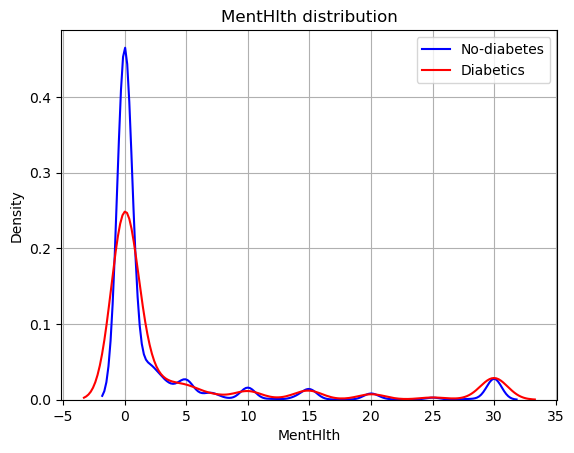

In [30]:
sns.kdeplot(mental_no, color='blue')
sns.kdeplot(mental_yes, color='red')
plt.grid()
plt.title('MentHlth distribution')
plt.legend(['No-diabetes', 'Diabetics'])

Проверим данные на нормальность:

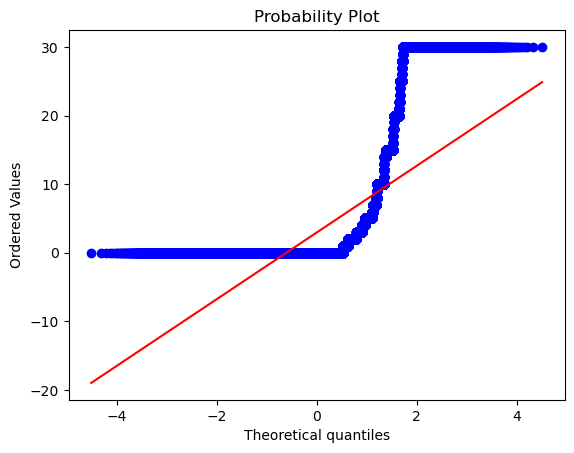

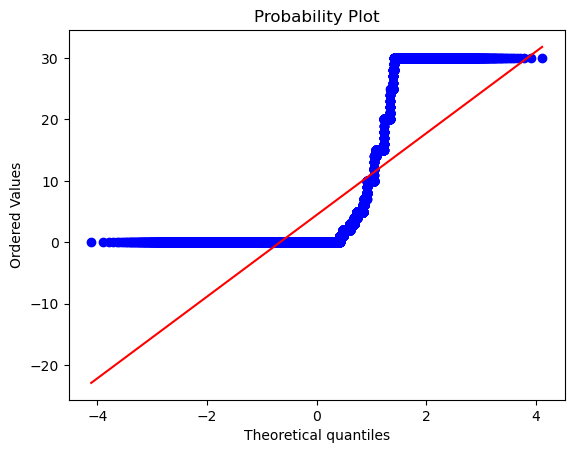

In [31]:
stats.probplot(mental_no, dist = 'norm', plot = plt)
plt.show()

stats.probplot(mental_yes, dist = 'norm', plot = plt)
plt.show()

Проведем тест Колмогорова-Смирнова для определения нормальности распределения:

In [32]:
groups = [mental_no, mental_yes]
for group in groups:
    ks_value, p_value = stats.kstest(group, stats.norm.cdf)
    if p_value < 0.01:
        print(f'Not normal\nKS = {round(ks_value, 4)}\np-value = {round(p_value, 4)}\n')
    else:
        print(f'Normal\nKS = {round(ks_value, 4)}\np-value = {round(p_value, 4)}\n')

Not normal
KS = 0.5
p-value = 0.0

Not normal
KS = 0.5
p-value = 0.0



Данные распределены не нормально. Для сравнения в двух независимых группах необходимо использовать критерий Манна-Уитни.

In [33]:
mental = pd.DataFrame({'no':mental_no, 'yes':mental_yes})

Из двух выборок получим одну, отсортируем и затем расставим ранги. Максимальное значение в группе имеет первый ранг и т.д.

In [34]:
mental = mental.stack().reset_index(-1).iloc[:, ::-1]
mental.columns = ['value', 'group']
mental

value group
0        18.0    no
1         0.0    no
2        30.0    no
3         0.0    no
4         3.0    no
...       ...   ...
253675    0.0    no
253676    0.0   yes
253677    0.0    no
253678    0.0    no
253679    0.0   yes

[249049 rows x 2 columns]

Проставляем ранги (номера элементов в упорядоченной по возрастанию выборке):

In [35]:
mental['rank'] = mental['value'].rank(ascending = False, numeric_only = True)
mental.head()

value group      rank
0   18.0    no   17173.0
1    0.0    no  162687.5
2   30.0    no    5864.0
3    0.0    no  162687.5
4    3.0    no   51456.5

Дальше необходимо вычислить сумму рангов:

In [36]:
mental.groupby('group')['rank'].sum()

group
no     2.682346e+10
yes    4.189370e+09
Name: rank, dtype: float64

Разделям обратно на 2 выборки:

In [37]:
mental_yes = mental[mental['group'] == 'yes']['value']
mental_no = mental[mental['group'] == 'no']['value']
rank_yes = mental[mental['group'] == 'yes']['rank'].sum()
rank_no = mental[mental['group'] == 'no']['rank'].sum()

Вычисляем критерий по формуле:

In [38]:
number_of_values_yes = mental_yes.count()
number_of_values_no = mental_no.count()
all_values =  number_of_values_yes * number_of_values_no
max_rank = max(rank_yes, rank_no)
max_count = float()
if rank_yes > rank_no:
    max_count = number_of_values_yes
else:
    max_count = number_of_values_no

In [39]:
u_criterion = all_values + (max_count * (max_count + 1))/2 - max_rank
print(f'U-criterion = {round(u_criterion, 4)}')

U-criterion = 3564682389.5


Для размера выборки больше 60 распределение U-критерия сходится к нормально, поэтому необходимо рассчитать Z-значение и получить p-value для корректной интерпертации результатов.

In [40]:
m_u = (number_of_values_yes*number_of_values_no)/2
sigma_u = np.sqrt((number_of_values_yes*number_of_values_no)*(number_of_values_yes+number_of_values_no+1)/12)

In [41]:
z_score = (u_criterion - m_u)/sigma_u
print(f'Z-score = {round(z_score, 4)}')

Z-score = -16.9392


In [42]:
p_value = stats.norm.cdf(z_score)
print(f'p_value = {round(p_value, 4)}')

p_value = 0.0


Проверка на статистически важные показатели:

In [43]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')
print(f'\nU-criterion = {round(u_criterion, 4)} \nz-score = {round(z_score, 4)} \np-value = {round(p_value, 4)}')

Reject Null Hypothesis

U-criterion = 3564682389.5 
z-score = -16.9392 
p-value = 0.0


Проверка с помощью библиотеки:

In [44]:
um_stat, p_value = stats.mannwhitneyu(mental_no, mental_yes, alternative = 'two-sided')
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')
print(f'\nU-criterion = {round(u_criterion, 4)} \np-value = {round(p_value, 4)}')

Reject Null Hypothesis

U-criterion = 3564682389.5 
p-value = 0.0


Следовательно, можно сказать, что отсутствие или наличие диабета в значтельной степени влияет на ментальное здоровье людей.

### Критерий Хи-квадрат Пирсона для эффективного сравнения долей

**$H_0$** - наличие диабета не зависит от возраста.

**$H_1$** - наличие диабета зависит от возраста.

Изучим распределение количества людей страдающих диабетом по возрасту:

In [45]:
ax = px.treemap(data, path=['Age', 'Diabetes_012'], title="Age counts")
ax.show()

Изучим распределение:

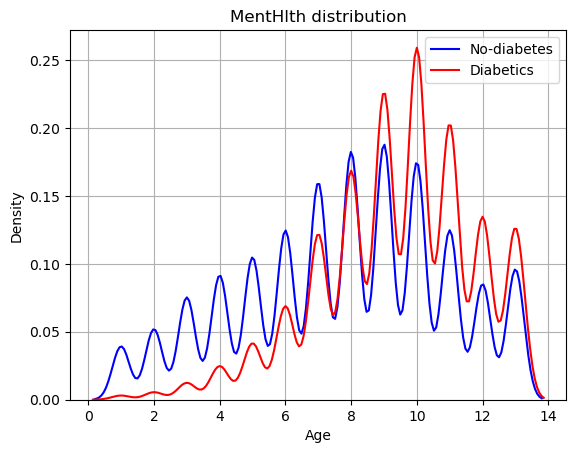

In [46]:
sns.kdeplot(dia_no['Age'], color='blue')
sns.kdeplot(dia_yes['Age'], color='red')
plt.grid()
plt.title('MentHlth distribution')
plt.legend(['No-diabetes', 'Diabetics'])

Составим таблицу сопряженности:

In [47]:
table = pd.crosstab(data['Diabetes_012'], data['Age'], margins = True)
table

Age            1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0  \
Diabetes_012                                                                
0.0           5601  7404  10737  13055  14943  17765  22808  26019  26809   
1.0             21    54     72    142    163    312    418    550    702   
2.0             78   140    314    626   1051   1742   3088   4263   5733   
All           5700  7598  11123  13823  16157  19819  26314  30832  33244   

Age            10.0   11.0   12.0   13.0     All  
Diabetes_012                                      
0.0           24939  17790  12132  13701  213703  
1.0             697    602    445    453    4631  
2.0            6558   5141   3403   3209   35346  
All           32194  23533  15980  17363  253680

Найдем значение критерия Хи-квадрата:

In [48]:
expected = []
obs1 = np.append(table.iloc[0][0:-1].values, table.iloc[1][0:-1].values)
obs1 = np.append(obs1, table.iloc[2][0:-1].values)
rows = table.iloc[0:-1, -1].values
cols = table.iloc[-1, 0:-1].values
total = table.loc['All', 'All']

In [49]:
for count in range(3):
    for column in cols:
        expected.append((rows[count]*column)/total)
obs = obs1 + 0.5*np.sign(expected - obs1)

In [50]:
chisq_criterion = sum(((obs - expected)**2)/expected)
print(f'Chi^2-criterion = {round(chisq_criterion, 4)}')

Chi^2-criterion = 9628.8598


Уровень значимости:

In [51]:
p_value = 1 - stats.chi2.cdf(chisq_criterion, 24)
print(f'p-value = {p_value}')

p-value = 0.0


In [52]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')
print(f'\nChi^2-criterion = {round(chisq_criterion, 4)} \np-value = {round(p_value, 4)} \ndf = 24')

Reject Null Hypothesis

Chi^2-criterion = 9628.8598 
p-value = 0.0 
df = 24


С помощью библиотеки:

In [53]:
table = pd.crosstab(data['Diabetes_012'], data['Age'])

In [54]:
chisq = stats.chi2_contingency(table)
chisq_criterion, p_value, df = chisq[0], chisq[1], chisq[2]

In [55]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')
print(f'\nChi^2-criterion = {round(chisq_criterion, 4)} \np-value = {round(p_value, 4)} \ndf = {df}')

Reject Null Hypothesis

Chi^2-criterion = 9641.3765 
p-value = 0.0 
df = 24


Мы отвергаем нулевую гипотезу о наличия диабета независимо от возраста. Можно сделать вывод, что люди разного возраста в большей или меньше степени страдают от диабета.

### Критерий Стюьюдента для множественных сравнений

**$H_0$** - люди страдающие диабетом, имеющие преддиабет и не имеющие диабет имеют одинаковый усредненный показатель ИМТ.

**$H_1$** - люди страдающие диабетом, имеющие преддиабет и не имеющие диабет имеют различные показатели ИМТ.

Изучим показатели ИМТ:

In [87]:
ax = px.treemap(data, path=['BMI', 'Diabetes_012'], title="BMI counts")
ax.show()

In [57]:
bmi_no = dia_no['BMI']
bmi_pred = dia_pred['BMI']
bmi_yes =  dia_yes['BMI']

Рассмотрим распределение ИМТ:

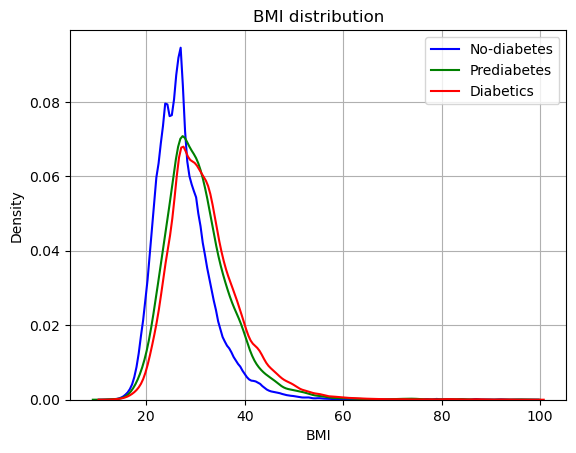

In [58]:
sns.kdeplot(bmi_no, color='blue')
sns.kdeplot(bmi_pred, color='green')
sns.kdeplot(bmi_yes, color='red')
plt.grid()
plt.title('BMI distribution')
plt.legend(['No-diabetes', 'Prediabetes', 'Diabetics'])

Вычисляем средний ИМТ для каждой из групп:

In [59]:
avg_bmi_no = bmi_no.mean()
avg_bmi_pred = bmi_pred.mean()
avg_bmi_yes = bmi_yes.mean()

print(f'Average BMI for no-diabetics is {round(avg_bmi_no, 4)}\n' +
      f'Average BMI for prediabetes is {round(avg_bmi_pred, 4)}\n' +
      f'Average BMI for diabetics is {round(avg_bmi_yes, 4)}')

Average BMI for no-diabetics is 27.7425
Average BMI for prediabetes is 30.7245
Average BMI for diabetics is 31.944


Далее вычисляем разницу по модулю:

In [60]:
avg_diff_no_pred = abs(avg_bmi_no - avg_bmi_pred)
avg_diff_yes_pred = abs(avg_bmi_yes - avg_bmi_pred)
avg_diff_no_yes = abs(avg_bmi_no - avg_bmi_yes)
print(f'Different between no-diabetics and prediabetics is {round(avg_diff_no_pred, 4)}\n'
     +f'Different between diabetics and prediabetics is {round(avg_diff_yes_pred, 4)}\n'
     +f'Different between no-diabetics and diabetics is {round(avg_diff_no_yes, 4)}\n')

Different between no-diabetics and prediabetics is 2.9819
Different between diabetics and prediabetics is 1.2195
Different between no-diabetics and diabetics is 4.2015



Дальше вычисляем стандартную ошибку разности выборочных средних:

In [61]:
n_no = bmi_no.shape[0]
n_pred = bmi_pred.shape[0]
n_yes = bmi_yes.shape[0]

var_no = np.var(bmi_no, ddof = 1)
var_pred = np.var(bmi_pred, ddof = 1)
var_yes = np.var(bmi_yes, ddof = 1)

In [62]:
se_no_pred = np.sqrt(((n_no-1)*var_no+(n_pred-1)*var_pred)/(n_no+n_pred-2))
se_yes_pred = np.sqrt(((n_yes-1)*var_yes+(n_pred-1)*var_pred)/(n_yes+n_pred-2))
se_no_yes = np.sqrt(((n_no-1)*var_no+(n_yes-1)*var_yes)/(n_no+n_yes-2))
 
print(f'Standart error between no-diabetics and prediabetics is {round(se_no_pred, 4)}\n'
     +f'Standart error between diabetics and prediabetics is {round(se_yes_pred, 4)}\n'
     +f'Standart error between no-diabetics and diabetics is {round(se_no_yes, 4)}\n')

Standart error between no-diabetics and prediabetics is 6.2767
Standart error between diabetics and prediabetics is 7.3184
Standart error between no-diabetics and diabetics is 6.429



Статистика критерия Стюдента:

In [63]:
t_no_pred = avg_diff_no_pred/(se_no_pred*np.sqrt(1/n_no+1/n_pred))
t_yes_pred = avg_diff_yes_pred/(se_yes_pred*np.sqrt(1/n_yes+1/n_pred))
t_no_yes = avg_diff_no_yes/(se_no_yes*np.sqrt(1/n_no+1/n_yes))

print(f'T-criterion for no-diabetics and prediabetics is {round(t_no_pred, 4)}\n'
     +f'T-criterion for diabetics and prediabetics is {round(t_yes_pred, 4)}\n'
     +f'T-criterion for no-diabetics and diabetics is {round(t_no_yes, 4)}\n')

T-criterion for no-diabetics and prediabetics is 31.9851
T-criterion for diabetics and prediabetics is 10.6632
T-criterion for no-diabetics and diabetics is 113.8138



Плотности вероятностей:

In [64]:
x = np.linspace(-5.0, 5.0, 100)

df_no_pred = (n_no + n_pred) - 2
df_yes_pred = (n_yes + n_pred) - 2
df_no_yes = (n_no + n_yes) - 2

Text(0.5, 1.0, 'Density no-diabetics and diabetics')

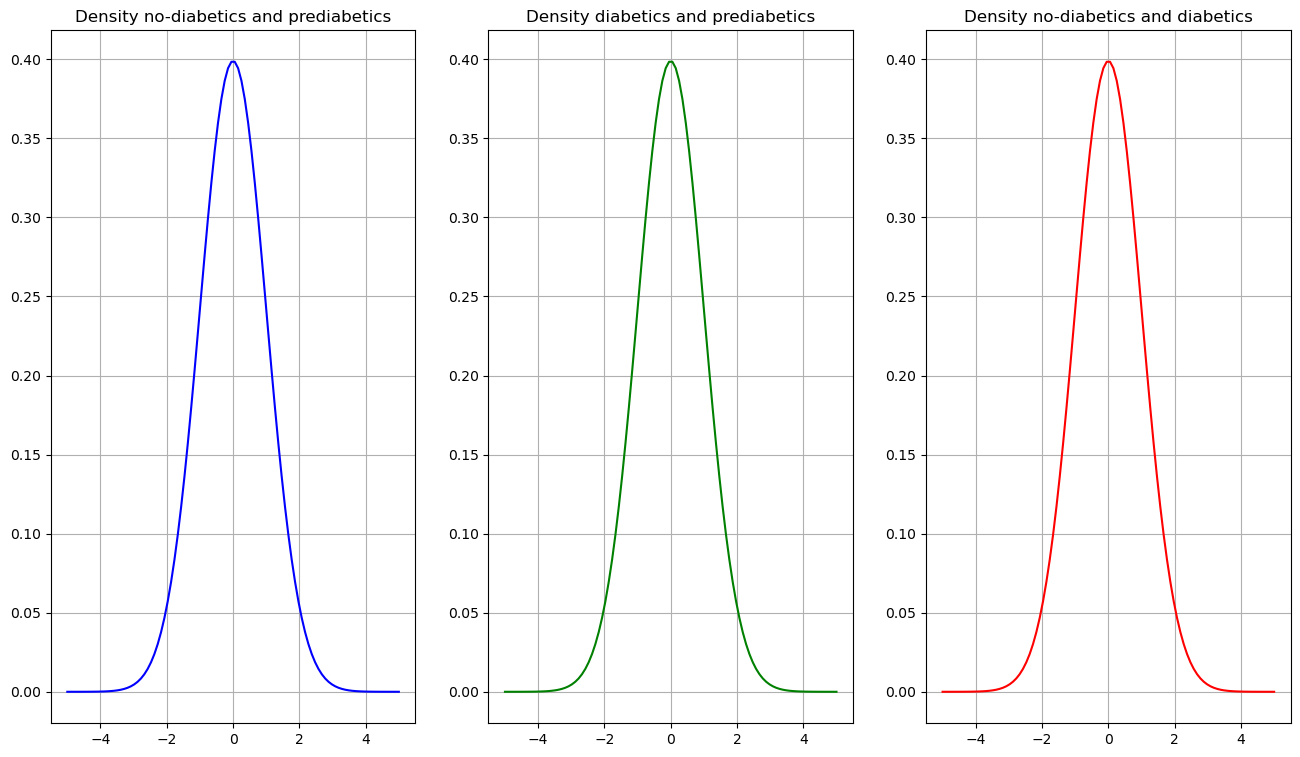

In [65]:
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize = (16, 9))

axs[0].plot(x, stats.t.pdf(x, df_no_yes), color = 'blue')
axs[0].grid(True)
axs[0].set_title('Density no-diabetics and prediabetics')

axs[1].plot(x, stats.t.pdf(x, df_yes_pred), color = 'green')
axs[1].grid(True)
axs[1].set_title('Density diabetics and prediabetics')

axs[2].plot(x, stats.t.pdf(x, df_no_yes), color = 'red')
axs[2].grid(True)
axs[2].set_title('Density no-diabetics and diabetics')

Опишем функцию распределения, которая показывает при заданном распределении, какова вероятность того, что результат окажется меньше или равен заданному.

In [66]:
p_no_pred = stats.t.sf(t_no_pred, df_no_pred)
p_yes_pred = stats.t.sf(t_yes_pred, df_yes_pred)
p_no_yes = stats.t.sf(t_no_yes, df_no_yes)

print(f'p-value for no-diabetics and prediabetics is {round(p_no_pred, 4)}\n'
     +f'p-value for diabetics and prediabetics is {round(p_yes_pred, 4)}\n'
     +f'p-value for no-diabetics and diabetics is {round(p_no_yes, 4)}\n')

p-value for no-diabetics and prediabetics is 0.0
p-value for diabetics and prediabetics is 0.0
p-value for no-diabetics and diabetics is 0.0



Откорректируем значение для множественного анализа поправкой Бонферрони и проверим гипотезы:

In [67]:
ttest = [t_no_pred, t_yes_pred, t_no_yes]
p_value = [p_no_pred, p_yes_pred, p_no_yes]
result = ['for no-diabetics and prediabetics', 'for diabetics and prediabetics', 'for no-diabetics and diabetics']
alpha = 0.05/len(p_value)

for p in zip(p_value, ttest, result):
    if p[0] < alpha:   
        print(f'\nReject Null Hypothesis {p[2]}')
    else:
        print(f'\nFailed to reject Null Hypothesis {p[2]}')
    print(f't = {round(p[1], 4)} \np-value = {round(p[0], 4)}')


Reject Null Hypothesis for no-diabetics and prediabetics
t = 31.9851 
p-value = 0.0

Reject Null Hypothesis for diabetics and prediabetics
t = 10.6632 
p-value = 0.0

Reject Null Hypothesis for no-diabetics and diabetics
t = 113.8138 
p-value = 0.0


Проделаем аналогичные операции с помощью библиотеки scipy.stats:

In [68]:
ttest_no_pred, p_no_pred  = stats.ttest_ind(bmi_no, bmi_pred)
ttest_yes_pred, p_yes_pred  = stats.ttest_ind(bmi_yes, bmi_pred)
ttest_p_no_yes, p_no_yes  = stats.ttest_ind(bmi_no, bmi_yes)

ttests = [ttest_no_pred, ttest_yes_pred, ttest_p_no_yes]
p_value = [p_no_pred, p_yes_pred, p_no_yes]
result = ['for no-diabetics and prediabetics', 'for diabetics and prediabetics', 'for no-diabetics and diabetics']
alpha = 0.05/len(p_value)

for p in zip(ttests, p_value, result):
    if p[1] < alpha:   
        print(f'\nReject Null Hypothesis {p[2]}')
    else:
        print(f'\nFailed to reject Null Hypothesis {p[2]}')
    print(f't = {round(p[0], 4)} \np-value = {round(p[1], 4)}')


Reject Null Hypothesis for no-diabetics and prediabetics
t = -31.9851 
p-value = 0.0

Reject Null Hypothesis for diabetics and prediabetics
t = 10.6632 
p-value = 0.0

Reject Null Hypothesis for no-diabetics and diabetics
t = -113.8138 
p-value = 0.0


Можно сделать вывод, что люди с диабетом, преддиабетом и не страдающие им имеют разный индекс ИМТ, так как мы отвергаем нулевую гипотезу о равенстве ИМТ.

## Прогнозирование

Построим прогноз для определения наличия диабета по ключевым параметрам, которые были рассмотрены в ходе проверки гипотез.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [70]:
data = data.drop(columns=['Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',\
                          'PhysHlth', 'NoDocbcCost', 'Sex', 'Education', 'Income'])

Разделим данные на прогноз и тест, где для теста возьмем 30% от всех данных:

In [72]:
X = data.loc[:, data.columns != 'Diabetes_012']
y = data.loc[:, 'Diabetes_012']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Модель OLS

Добавим константу ($b_0$) и построим модель OLS:

In [76]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [77]:
results = model.fit()
results.params = (np.exp(results.params)-np.exp(-results.params))/2
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Diabetes_012   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:04:02   Log-Likelihood:            -1.7190e+05
No. Observations:              177576   AIC:                         3.438e+05
Df Residuals:                  177564   BIC:                         3.439e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7439      0.012    -62.182      0.000      -0.767      -0.720
HighBP                   0.1587      0.004     45.176      0.000       0.152       0.166
HighChol                 0.1150      0.003     34.779      0.000       0.109       0.122
CholCheck                0.0949      0.008     11.821      0.000       0.079       0.111
BMI                      0.0149      0.000     61.324      0.000       0.014       0.015
Stroke                   0.0832      0.008     10.448      0.000       0.068       0.099
HeartDiseaseorAttack     0.1455      0.006     26.176      0.000       0.135       0.156
PhysActivity            -0.0211      0.004     -5.688      0.000      -0.028      -0.014
GenHlth                  0.1058      0.002     60.720      0.000       0.102       0.109
MentHlth                -0.0010      0.000     -4.556      0.000      -0.001      -0.001
DiffWalk                 0.1034      0.005     21.759      0.000       0.094       0.113
Age                      0.0162      0.001     28.897      0.000       0.015       0.017
==============================================================================
Omnibus:                    40738.928   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76633.542
Skew:                           1.453   Prob(JB):                         0.00
Kurtosis:                       4.383   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент детерминации можно считать значимым, так как уровень значимости Prob(F-statistic) < 0.05.
Также все коэффициенты регрессии тоже можно считать значимыми, так как значение p-value для всех < 0.05.

Построим прогноз:

In [78]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
np.round(y_pred)

219620    0.0
132821    1.0
151862   -0.0
139717   -0.0
239235    1.0
         ... 
58678     0.0
203840    0.0
206241    0.0
53188     0.0
53404     0.0
Length: 76104, dtype: float64

In [79]:
residual = y_test - y_pred
residual

219620   -0.091419
132821   -0.548439
151862    0.190849
139717    0.027202
239235   -0.556793
            ...   
58678    -0.086581
203840    1.516885
206241   -0.039284
53188    -0.225164
53404    -0.268085
Length: 76104, dtype: float64

#### Проверка линейной зависимости

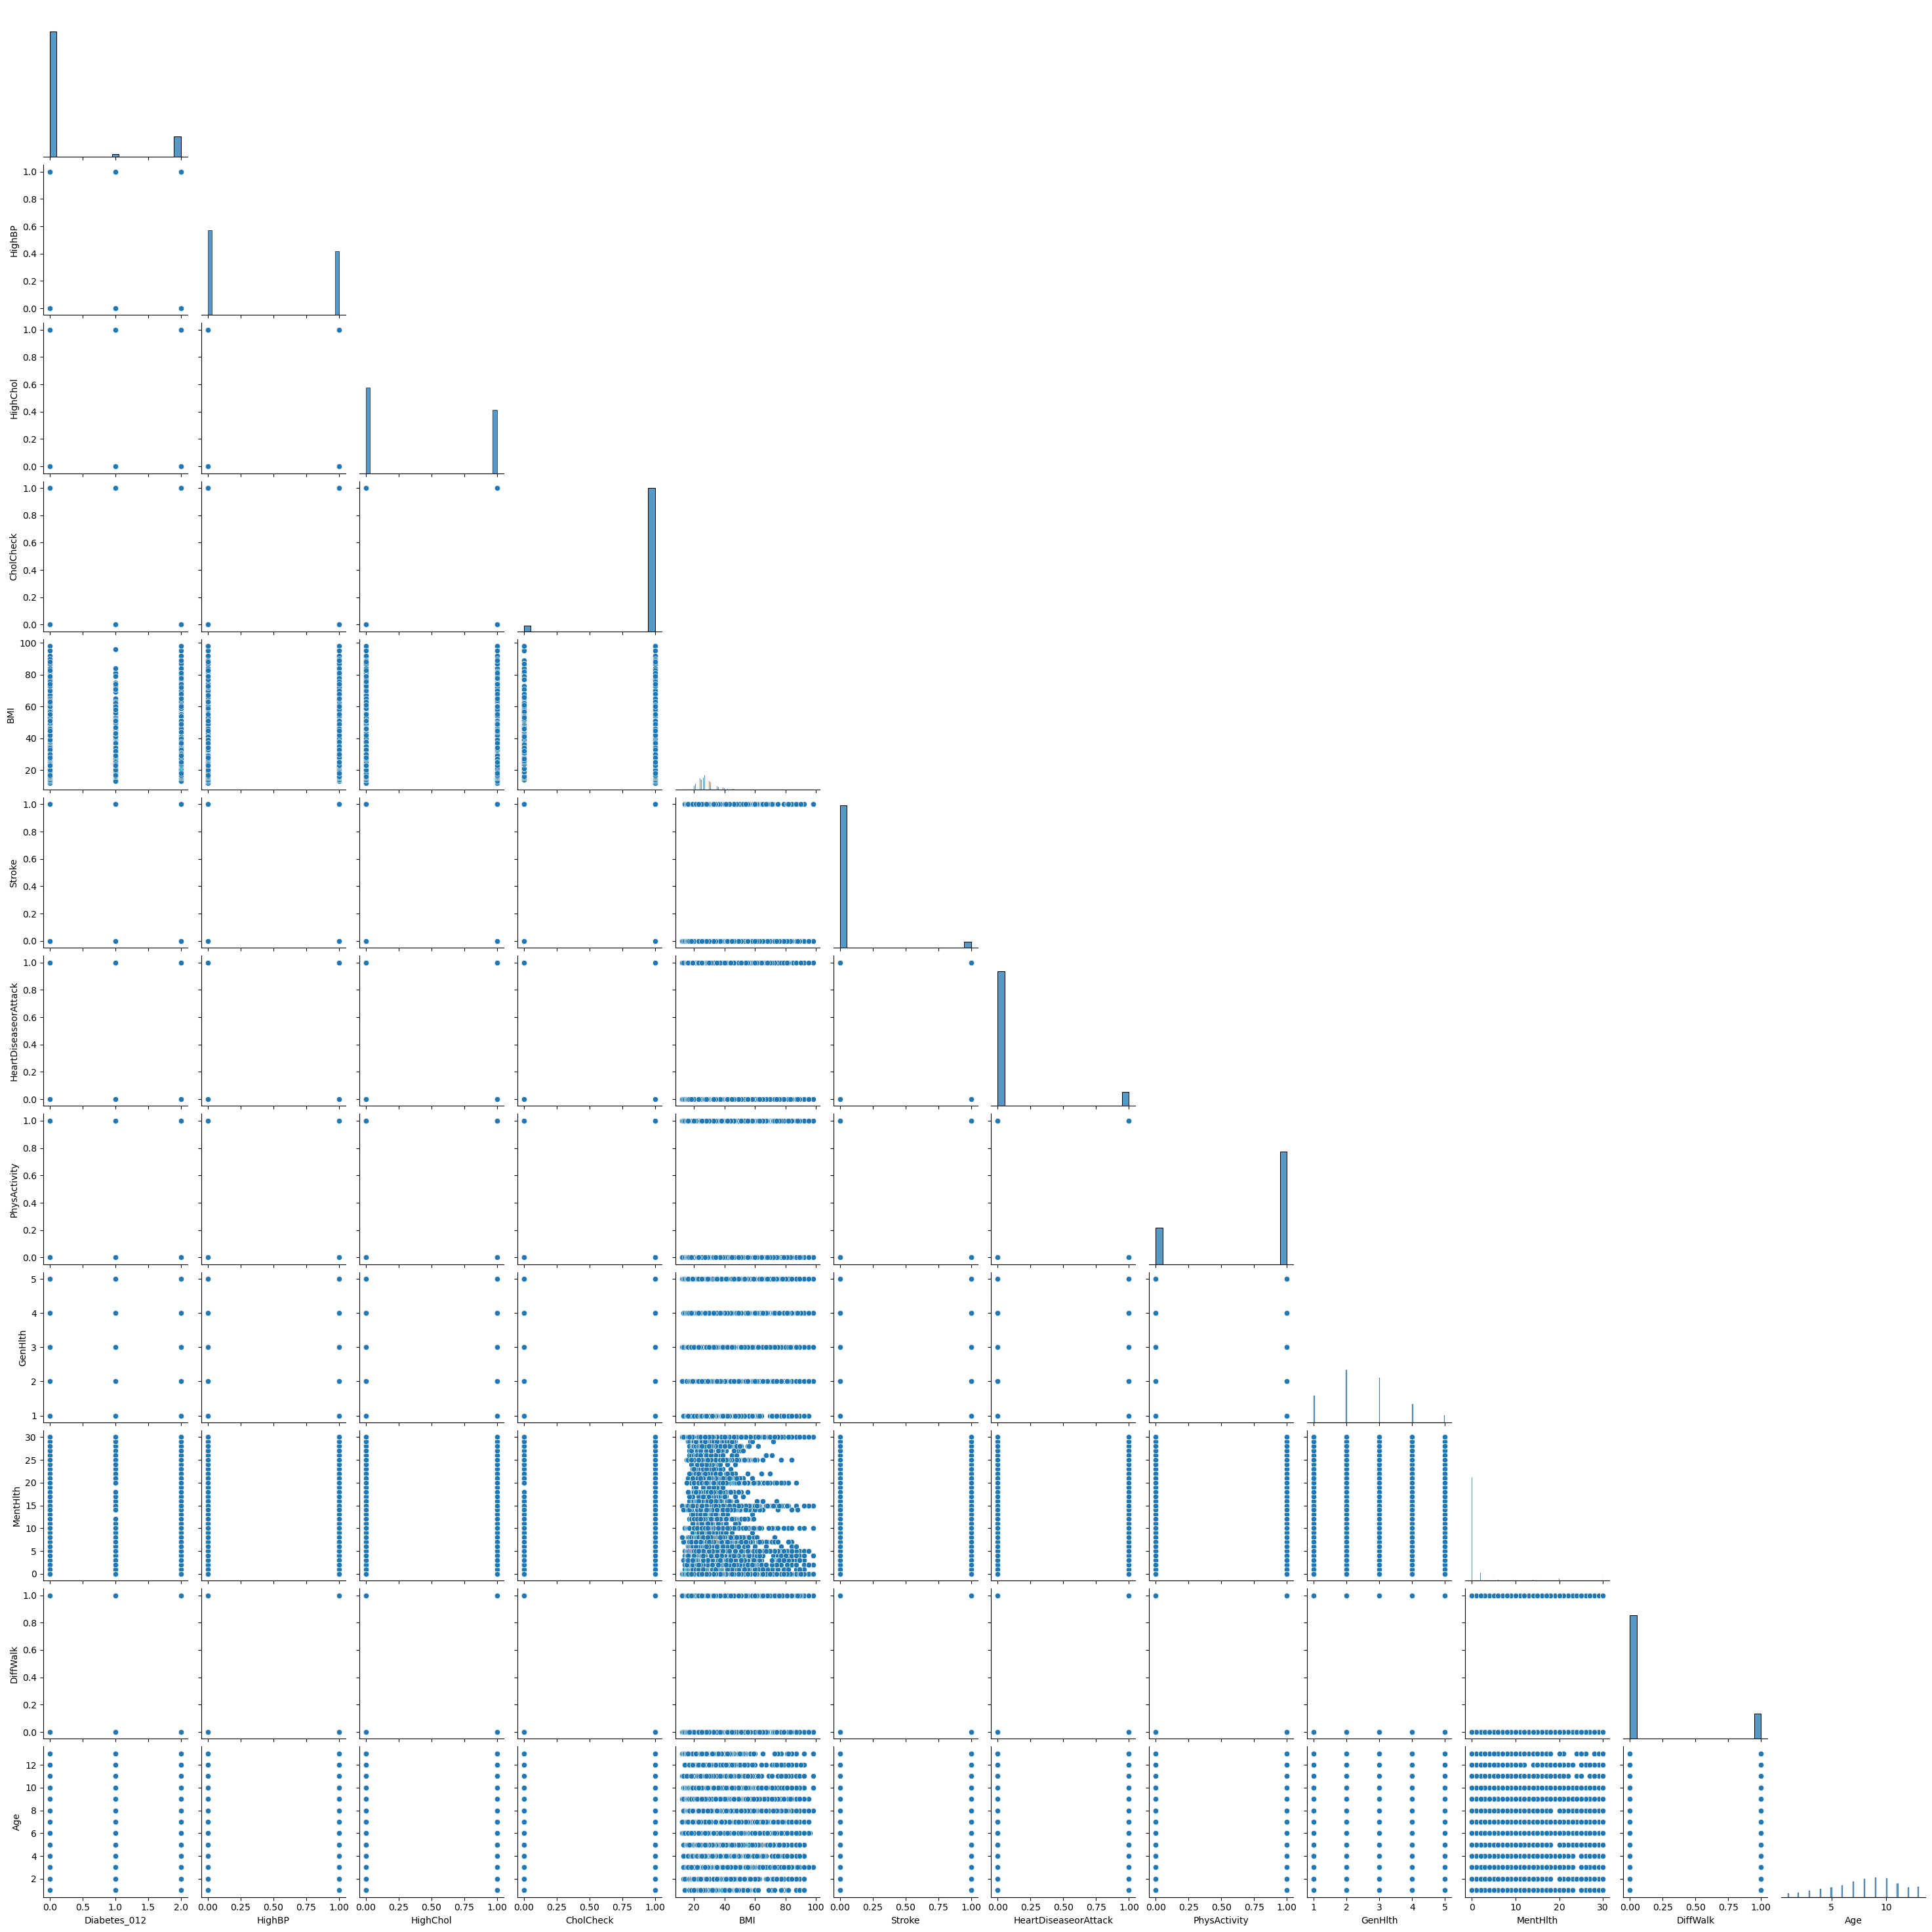

In [80]:
sns.pairplot(data, corner=True)

Данные не имеют линейную зависимость, в своем большинстве они распределены равномерно.

#### Отсутствие мультиколлинеарности

Проверем переменные на избыточность:

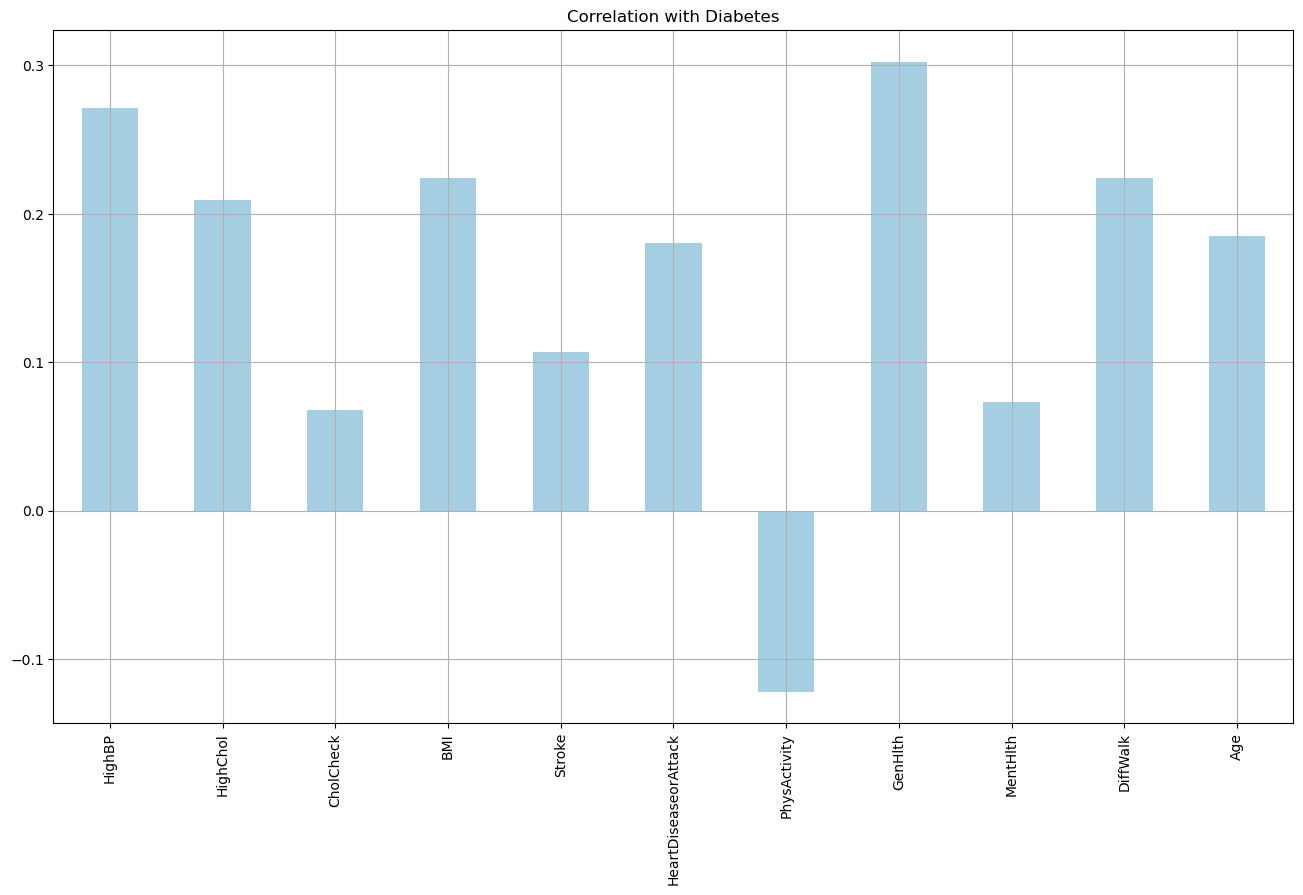

In [88]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012)\
.plot(kind='bar', grid=True, figsize=(16, 9), title='Correlation with Diabetes', cmap='Paired');

In [89]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

HighBP  HighChol  CholCheck        BMI   Stroke  HeartDiseaseorAttack  \
vif  2.240502  2.020099  17.554931  14.983437  1.12391              1.272647   

     PhysActivity   GenHlth  MentHlth  DiffWalk       Age  
vif      4.043749  9.273912  1.358099  1.629555  8.696048

Данный тест показал, что можно было удалить также переменную CholCheck. К этому можно привязать логическое объяснение, так как данная переменная отображают ту же информацию, но в меньшей мере, что содержится в переменной HighChol.

#### Нормальное распределение ошибок

<AxesSubplot: ylabel='Density'>

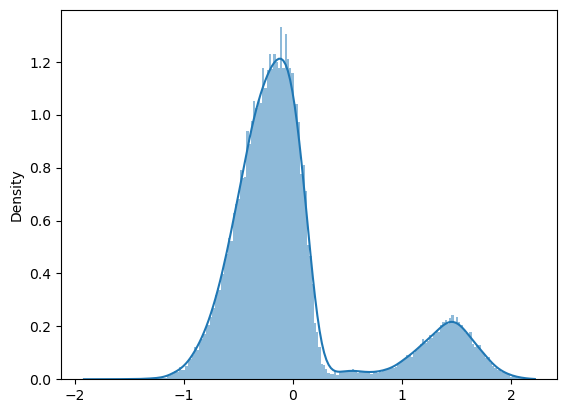

In [90]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

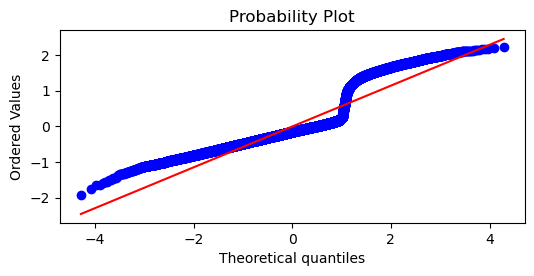

In [91]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual[:], plot=ax, fit=True)

In [92]:
np.mean(residual)

-0.0035251080907598557

Проведем тест Колмогорова-Смирнова для определения нормальности распределения остатков:

In [93]:
ks_value, p_value = stats.kstest(residual, stats.norm.cdf)
if p_value < 0.01:
    print(f'Not normal\nKS = {round(ks_value, 4)}\np-value = {round(p_value, 4)}\n')
else:
    print(f'Normal\nKS = {round(ks_value, 4)}\np-value = {round(p_value, 4)}\n')

Not normal
KS = 0.2581
p-value = 0.0



Графики и тест Колмогорова-Смирнова показали, что ошибки имеют аномальное распределение.

#### Гомоскедастичность 

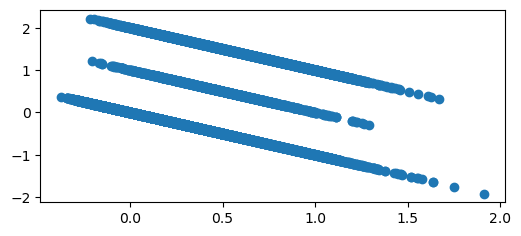

In [94]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

Проведем тест Уйта для определения гетероскедастичности остатков:

In [95]:
white_test = het_white(results.resid, results.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
dict(zip(labels, np.round(white_test, 4)))

{'Test Statistic': 32802.7462,
 'Test Statistic p-value': 0.0,
 'F-Statistic': 574.5587,
 'F-Test p-value': 0.0}

Уровень значимости критерия Фишера ниже, чем 0.05, благодаря чему можно отвергнуть нулевую гипотезу о наличии гетероскедастичности.

#### Отсутствие автокорреляции остатков

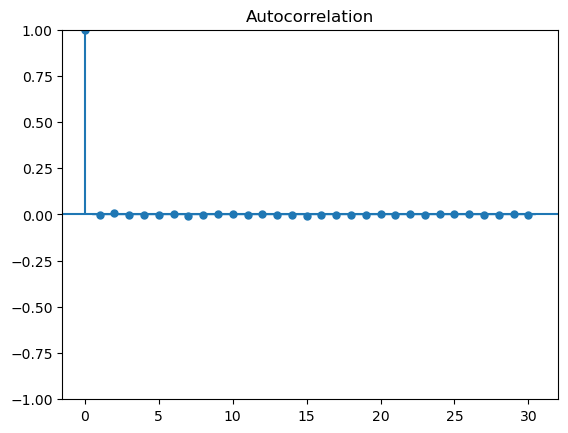

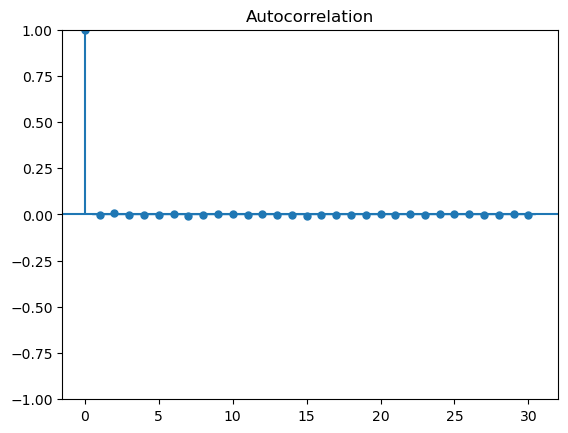

In [97]:
smt.graphics.plot_acf(residual, lags=30 , alpha=0.05)

По графику можно сказать об отсуствиии существенной линейной взаимосвязи предикторов.

### Градиентный спуск

Реализуем нахождение коэффициентов методом градиентного спуска:

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [101]:
iterations=30000+1
learning_rate = 0.01
stopping_threshold = 1e-6
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())
current_weight = np.zeros(X_train.shape[1])
current_bias = 0.0
iterations = iterations
learning_rate = learning_rate
n = float(X_train.shape[0])
costs = []
weights = []
previous_cost = np.inf
     
for i in range(iterations):
         
    y_pred = (X_train @ current_weight) + current_bias
    current_cost = np.square(y_train - y_pred).mean()
    if abs(previous_cost-current_cost)<=stopping_threshold:
        print(f'\nI got along in epochs is {i}!\n')
        break
         
    previous_cost = current_cost
        
    costs.append(current_cost)
    weights.append(current_weight)
         
    weight_derivative = -(2/n) * np.dot(X_train.T, (y_train-y_pred))
    bias_derivative = -(2/n) * sum(y_train - y_pred)
         
    current_weight = current_weight - (learning_rate * weight_derivative)
    current_bias = current_bias - (learning_rate * bias_derivative)
        
    if i%3000 == 0: print(f'Epochs {i}:\t\nBias {current_bias}, Weight {current_weight}')
        
print(f'Weight: {current_weight}\nBias: {current_bias}')

Epochs 0:	
Bias 0.005958012344010452, Weight [0.00443371 0.00394693 0.00591611 0.00137849 0.00054275 0.0013102
 0.00377247 0.00338824 0.00089564 0.0021941  0.0041447 ]
Epochs 3000:	
Bias -0.16165755302687454, Weight [ 0.19250984  0.12456594  0.03391615  0.33471325  0.07202592  0.14888136
 -0.04825121  0.42137638 -0.03077945  0.13528353  0.12067698]

I got along in epochs is 3318!

Weight: [ 0.19092976  0.12407413  0.0374702   0.3632684   0.0723884   0.14802205
 -0.04658797  0.42718284 -0.0329714   0.13286287  0.12385591]
Bias: -0.17438050578179914


Построим прогноз данных:

In [102]:
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())
y_pred = X_test @ current_weight + current_bias
np.round(y_pred[:10])

219620    0.0
132821    1.0
151862   -0.0
139717   -0.0
239235    1.0
68060     1.0
34035     0.0
159729    0.0
144332    0.0
228468    0.0
dtype: float64

Изучим статистические показатели:

In [103]:
mse = np.round(mean_squared_error(y_test, y_pred), 4)
mae = np.round(mean_absolute_error(y_test, y_pred), 4)
r2_score = np.round(r2_score(y_test, y_pred), 4)

In [104]:
print(f'Mean squared error is {mse}')
print(f'Mean absolute error is {mae}')
print(f'Coefficient of determination is {r2_score}')

Mean squared error is 0.4073
Mean absolute error is 0.4397
Coefficient of determination is 0.1581


Модель OLS на 1% лучше прогнозирует результаты, чем модель градиентного спуска, однако обе модели недостаточно удовлетворяюще справляются с нахождением взаимосвязи между данными.